In [1]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.patches as patches

# Left and right-hand sums

We want to find the approximate area under the graph of $f(x)=x^4$ for the interval $0 \leq x \leq 1$ by taking the right-hand sum. Using $n=25$.

$$\Delta x=\dfrac{b-a}{n} \implies \dfrac{1-0}{25} = \dfrac{1}{25}$$

We are going to calculate the area of 25 rectangles and take their sum. This can be expressed as:

$$R_{25} = \sum\limits_{i=1}^n f(x_i)\cdot\Delta x \iff \sum\limits_{i=1}^n f\left(a+i \cdot \Delta x \right)\cdot \Delta x \implies \sum\limits_{i=1}^{25} \left(i\cdot \dfrac{1}{25}\right)^4\cdot \dfrac{1}{25}=\dfrac{1}{25}\sum\limits_{i=1}^{25}\dfrac{i^4}{25^4}=0.22$$

In [4]:
def right_hand_sum(a, b, n, f):
    # Approximate the area under the graph with a right-hand sum.
    delta_x = (b-a)/n
    result = sum([f(x*delta_x)*delta_x for x in range(1, n)])
    
    # Line for plotting f(x)
    X = np.linspace(a, b, n)
    y = [f(x) for x in X]

    # Plot
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, aspect='equal')
    plot(X, y, c='b')
    ylabel('f(x)')
    xlabel('x')
    title('Right-hand sum estimated: {:.3f}'.format(result))

    # Drawing rectangles (right-hand)
    for x in range(0, n):
        ax.add_patch(patches.Rectangle(
            (a+x*delta_x, 0), 
            delta_x, 
            f(a+(x+1)*delta_x),
            fill=True,
            color='b',
            alpha=0.2
        ))
        
    return result

In [5]:
def left_hand_sum(a, b, n, f):
    # Approximate the area under the graph with a left-hand sum.
    delta_x = (b-a)/n
    result = sum([f((x-1)*delta_x)*delta_x for x in range(1, n)])
    
    # Line for plotting f(x)
    X = np.linspace(a, b, n)
    y = [f(x) for x in X]
    
    # Plot
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, aspect='equal')
    plot(X, y, c='b')
    ylabel('f(x)')
    xlabel('x')
    title('Left-hand sum estimated: {:.3f}'.format(result))
    
    # Drawing rectangles (left-hand)
    for x in range(0, n):
        ax.add_patch(patches.Rectangle(
            (a+x*delta_x, 0), 
            delta_x, 
            f(a+x*delta_x),
            fill=True,
            color='b',
            alpha=0.2
        ))
        
    return result

Taking the right-hand sum for $f(x)=x^4$ over the interval $0\leq x\leq 1$ with $n=25$:

0.18053324799999998

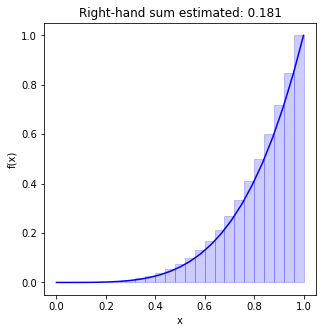

In [6]:
right_hand_sum(0, 1, 25, lambda x: x**4)

Considering that $\int^{2\pi}_0 \sin(x) \ dx=0$. Taking the right-hand sum for $f(x) = \sin x$ over the interval $0 \leq x \leq 2\pi$ with $n=50$:

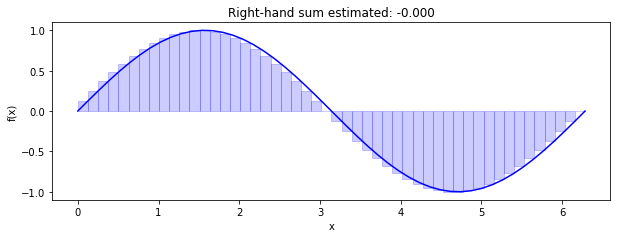

In [7]:
res = right_hand_sum(0, 2*math.pi, 50, lambda x: math.sin(x))

Left hand sum for $f(x)=\cos x$ over the interval $0 \leq x \leq \pi$ with $n=50$:

0.12553972183412598

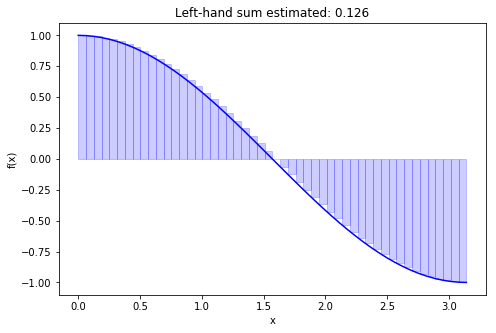

In [8]:
left_hand_sum(0, math.pi, 50, lambda x: math.cos(x))

Taking the right-hand sum for $f(x)=-x^2+10$ over the interval $-2\leq x\leq 2$ with $n=25$:

18.329599999999999

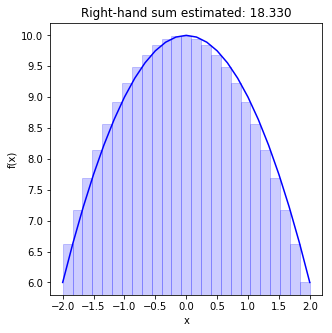

In [9]:
right_hand_sum(-2, 2, 25, lambda x: -x**2+10)

18.502400000000002

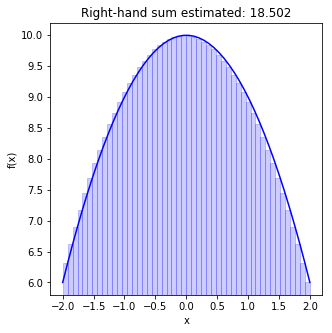

In [10]:
right_hand_sum(-2, 2, 50, lambda x: -x**2+10)

18.08592592592592

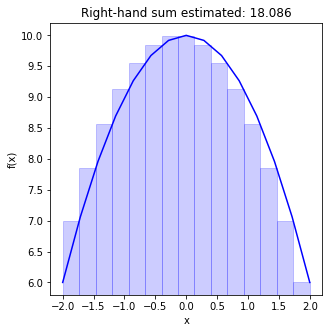

In [11]:
right_hand_sum(-2, 2, 15, lambda x: -x**2+10)

10.970964375000001

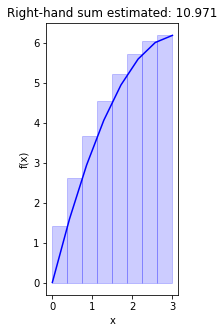

In [12]:
right_hand_sum(0, 3, 8, lambda x: -0.6380*x**2+3.97142*x+0.01666)

8.7101798437499998

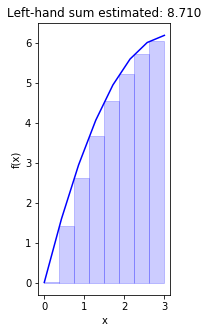

In [13]:
left_hand_sum(0, 3, 8, lambda x: -0.6380*x**2+3.97142*x+0.01666)

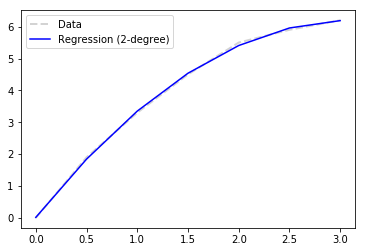

In [14]:
X = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
y = np.array([0, 1.9, 3.3, 4.5, 5.5, 5.9, 6.2])
a = min(X)
b = max(X)
n = len(X)

degree = 2
fit = np.polyfit(X, y, degree)
p = np.poly1d(fit)
linspace = np.linspace(a, b, n)
fx = p(linspace)

plot(X, y, c='lightgray', linestyle='--', lw=2.0)
plot(linspace, fx, c='b')

legend(['Data', 'Regression ({}-degree)'.format(degree)])

delta_x = (b-a)/(n-1)

L = [fit[0]*x**2 + fit[1]*x + fit[2] for x in linspace[:-1]]
R = [fit[0]*x**2 + fit[1]*x + fit[2] for x in linspace]

In [15]:
delta_x

0.5

In [16]:
L

[0.016666666666660997,
 1.8428571428571381,
 3.3499999999999956,
 4.5380952380952353,
 5.4071428571428557,
 5.9571428571428573]

In [17]:
sum(L)*delta_x

10.55595238095237

In [18]:
R

[0.016666666666660997,
 1.8428571428571381,
 3.3499999999999956,
 4.5380952380952353,
 5.4071428571428557,
 5.9571428571428573,
 6.1880952380952392]

In [19]:
sum(R)*delta_x

13.64999999999999

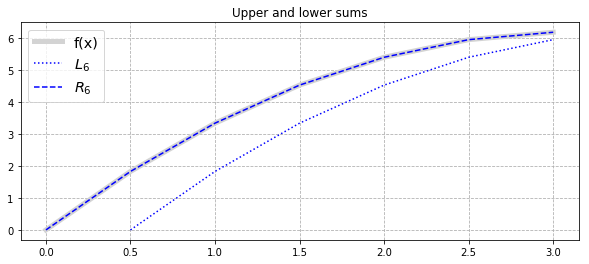

In [20]:
plt.figure(figsize=(10,4))
plot(linspace, fx, lw=5, c='lightgray')
plot(linspace[1:], L, c='b', ls='dotted')
plot(linspace, R, c='b', ls='--')
grid(linestyle='--')
legend(['f(x)', '$L_6$', '$R_6$'], fontsize='x-large')
title('Upper and lower sums');

## The Definite Integral

$$ \tag{1}\lim_{n\rightarrow\infty} \sum\limits_{i=1}^n f(x_i^*)\cdot\Delta x = \lim_{n\rightarrow\infty}\Bigl[\ f(x_1^*)\cdot\Delta x+f(x_2^*)\cdot\Delta x+\ldots+f(x_n^*)\cdot\Delta x\ \Bigr]$$

This type of limit gets a special name and notation.

**Definition of a Definite Integral**

If $f$ is a function defined for $a\leq x\leq b$, we divide the interval $[a,b]$ into $n$ subintervals of equal width $\Delta x=(b-a)/n$.

We let $x_0 (=a), x_1, x_2, \ldots, x_n(=b)$ be the endpoints of these subintervals and we let $x_1*, x_2*, \ldots, x_n*$ be any sample points in these sub-intervals, so $x_i*$ lies in the $i$-th subinterval $[x_{i-1},x_i]$. Then the definite integral of $f$ from $a$ to $b$ is:

$$\tag{2}\int_a^bf(x) \ dx = \underbrace{\lim_{n\rightarrow\infty}\sum\limits_{i=1}^nf(x_i^*)\cdot\Delta x}_{\text{Riemann sum}}$$

The _integrand_ is $f$ and the _limits of integration_ are $a$ and $b$. The _lower limit_ is $a$, and the _upper limit_ is $b$. the procedure for calculating the integral is called _integration_.

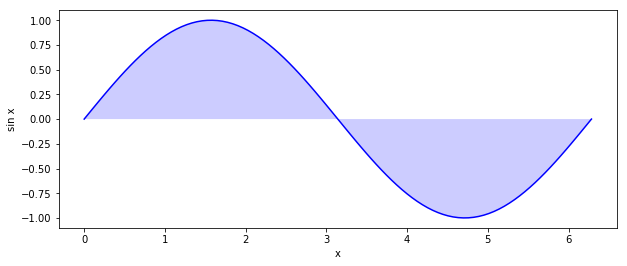

In [21]:
x = np.linspace(0, 2*math.pi, 100)
y = np.array([math.sin(x) for x in x])

plt.figure(figsize=(10,4))
plt.plot(x, y, c='b')
plt.fill_between(x,y, facecolor='b', alpha=0.2)
plt.xlabel('x')
plt.ylabel('sin x');

**Theorem (3)**

If $f$ is continuous on $[a,b]$, or if $f$ has only a finite number of jumps discontinuities, then $f$ is integrable on $[a,b]$, that is, the definite integral $\int_a^bf(x) \ dx$ exists.

**Theorem (4)**

If $f$ is integrable on $[a,b]$ then

$$\tag{4}\int_a^b f(x) \ dx = \lim_{n\rightarrow\infty}f(x_i)\cdot\Delta x$$

**Rules for sums**

$\tag{5}\sum\limits_{i=1}^n i = \dfrac{n(n+1)}{n}$

$\tag{6}\sum\limits_{i=1}^n i^2 = \dfrac{n(n+1)(2n+1)}{6}$

$\tag{7}\sum\limits_{i=1}^n i^3 = \left[\dfrac{n(n+1)}{2}\right]^2$

$\tag{8}\sum\limits_{i=1}^n c = nc$

$\tag{9}\sum\limits_{i=1}^n c\cdot a_i = c \sum\limits_{i=1}^n a_i$

$\tag{10}\sum\limits_{i=1}^n (a_i + b_i) = \sum\limits_{i=1}^n a_i + \sum\limits_{i=1}^n b_i$

$\tag{11}\sum\limits_{i=1}^n (a_i - b_i) = \sum\limits_{i=1}^n a_i - \sum\limits_{i=1}^n b_i$

**Midpoint rule**

$$\int_a^b f(x) \ dx \approx \sum\limits_{i=1}^n f(\bar{x}_i)\cdot\Delta x = \Delta x \left[ f(\bar{x}_1) + f(\bar{x}_2) + \ldots + f(\bar{x}_n) \right]$$

where $\Delta x = \dfrac{b-a}{n}$ and $\bar{x}_i=\dfrac{1}{2}(x_{i-1}, x_i)$ is the midpoint of $[x_{i-1}, x_i]$.

**Properties of the Definite Integral**

$$\int_a^b f(x) \ dx = -\int_b^a f(x) \ dx$$

$$\int_a^b f(x) \ dx = 0$$

$$\tag{1}\int_a^b c\ dx = c(b-a) \qquad ,\text{where $c$ is any constant}$$

$$\tag{2}\int_a^b\left[f(x)+g(x)\right]\ dx = \int_a^b f(x)\ dx + \int_a^b g(x)\ dx$$

$$\tag{3}\int_a^b c\cdot f(x) \ dx = c \int_a^b f(x)\ dx \qquad ,\text{where $c$ is any constant}$$

$$\tag{4}\int_a^b\left[f(x)-g(x)\right]\ dx = \int_a^b f(x)\ dx - \int_a^b g(x)\ dx$$

$$\tag{5} \int_a^c f(x)\ dx + \int_c^b f(x)\ dx = \int_a^b f(x)\ dx$$

**Comparison Properties of the Integral**

$$\tag{6}\text{If $f(x) \geq 0$ for $a\leq x\leq b$, then} \int_a^b f(x)\ dx \geq 0.$$

$$\tag{7}\text{If $f(x) \geq g(x)$ for $a\leq x\leq b$, then} \int_a^b f(x)\ dx \geq \int_a^b g(x)\ dx.$$

$$\tag{8}\text{If $m \leq f(x) \leq M$ for $a\leq x \leq b$, then } m(b-a) \leq \int_a^b f(x)\ dx \leq M(b-a).$$

In [22]:
def riemann_sum(a, b, n, f):
    # Calculating the Riemann sum using midpoints
    delta_x = (b - a) / n
    x = np.linspace(a, b - delta_x, n) + delta_x / 2
    y = np.array([f(x) for x in x])
    print('Riemann sum for {} from {} to {} with n={}:'.format('f', a, b, n))
    print('delta_x: {}'.format(delta_x))
    print('x: {}'.format(x))
    print('y: {}'.format(y))
    result = sum(y) * delta_x
    
    # Plotting
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.axvline(x=a, c='lightgray', ls='--')
    ax.axvline(x=b, c='lightgray', ls='--')
    rng = b - a
    px = np.linspace(a - rng * 0.25, b + rng * 0.25, n+100)
    py = np.array([f(x) for x in px])
    plot(px, py, c='b', lw=2)
    xlim(a - rng * 0.1, b + rng * 0.1)
    rngy = np.max(y) - np.min(y)
    spacing = rngy * 0.10
    ylim(np.min(y)-spacing, np.max(y)+spacing)
    for x, y in zip(x, y):
        ax.add_patch(patches.Rectangle(
                (x - delta_x / 2, 0), 
                delta_x, 
                y,
                fill=True,
                color='b' if y >= 0 else 'r',
                alpha=0.2
            ))
    title('Riemann sum for f, ${:.2f}\leq x\leq{:.2f}$, n=${}$'.format(a,b,n))
    ylabel('f(x)')
    xlabel('x')
    
    if abs(round(result, 6)) == 0: return 0
    return result

Riemann sum for f from 0 to 1.5707963267948966 with n=4:
delta_x: 0.39269908169872414
x: [ 0.19634954  0.58904862  0.9817477   1.37444679]
y: [ 0.92532811  0.47795337  0.09526994  0.00144858]


0.58904862254808621

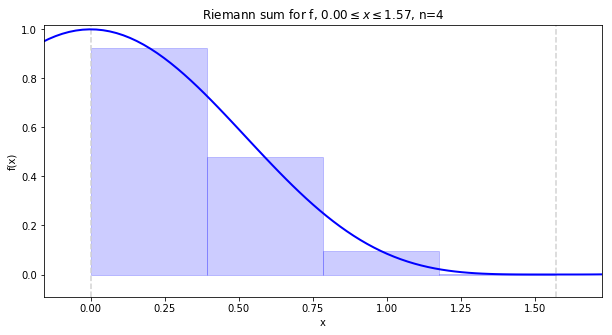

In [23]:
riemann_sum(0, math.pi/2, 4, lambda x: math.cos(x)**4)

Calculating the Riemann Sum for an area under the probability density function:

$$f(x\ |\ \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Riemann sum for f from -10 to 10 with n=40:
delta_x: 0.5
x: [-9.75 -9.25 -8.75 -8.25 -7.75 -7.25 -6.75 -6.25 -5.75 -5.25 -4.75 -4.25
 -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75
  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75  6.25  6.75  7.25  7.75
  8.25  8.75  9.25  9.75]
y: [ 0.00890236  0.01301779  0.01865878  0.02621461  0.03610086  0.04873107
  0.06447753  0.08362284  0.10630547  0.13246477  0.16179284  0.1937012
  0.22731046  0.26146927  0.29480577  0.32581077  0.35294659  0.37477159
  0.39006631  0.39794617  0.39794617  0.39006631  0.37477159  0.35294659
  0.32581077  0.29480577  0.26146927  0.22731046  0.1937012   0.16179284
  0.13246477  0.10630547  0.08362284  0.06447753  0.04873107  0.03610086
  0.02621461  0.01865878  0.01301779  0.00890236]


3.5191170414520911

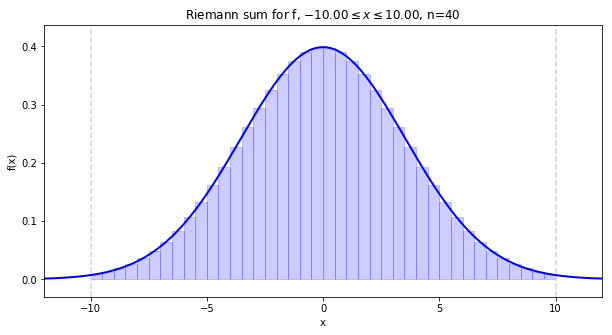

In [24]:
riemann_sum(-10, 10, 40, lambda x: 1/math.sqrt(2*math.pi)*math.e**(-(x)**2/25))

Riemann sum for f from 0 to 1 with n=16:
delta_x: 0.0625
x: [ 0.03125  0.09375  0.15625  0.21875  0.28125  0.34375  0.40625  0.46875
  0.53125  0.59375  0.65625  0.71875  0.78125  0.84375  0.90625  0.96875]
y: [ 0.03030396  0.08578491  0.13565063  0.18136597  0.22439575  0.26620483
  0.30825806  0.35202026  0.3989563   0.45053101  0.50820923  0.57345581
  0.6477356   0.73251343  0.82925415  0.93942261]


0.41650390625

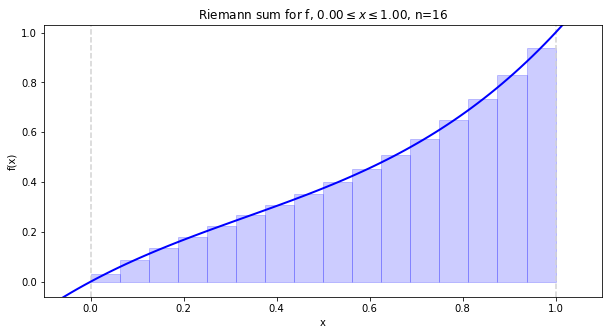

In [25]:
riemann_sum(0, 1, 16, lambda x: x**3-x**2+x)

Riemann sum for f from 0 to 3.141592653589793 with n=16:
delta_x: 0.19634954084936207
x: [ 0.09817477  0.29452431  0.49087385  0.68722339  0.88357293  1.07992247
  1.27627202  1.47262156  1.6689711   1.86532064  2.06167018  2.25801972
  2.45436926  2.6507188   2.84706834  3.04341788]
y: [ 0.99518473  0.95694034  0.88192126  0.77301045  0.63439328  0.47139674
  0.29028468  0.09801714 -0.09801714 -0.29028468 -0.47139674 -0.63439328
 -0.77301045 -0.88192126 -0.95694034 -0.99518473]


0

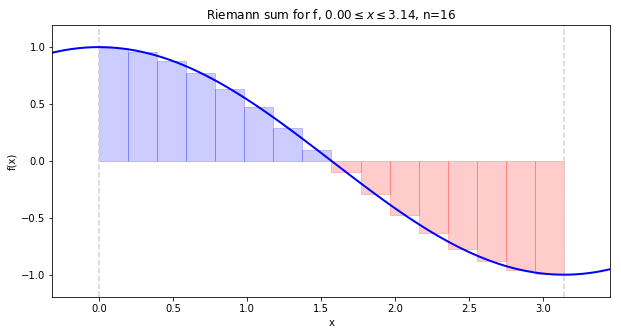

In [26]:
riemann_sum(0, math.pi, 16, lambda x: math.cos(x))

Riemann sum for f from 0 to 2 with n=50:
delta_x: 0.04
x: [ 0.02  0.06  0.1   0.14  0.18  0.22  0.26  0.3   0.34  0.38  0.42  0.46
  0.5   0.54  0.58  0.62  0.66  0.7   0.74  0.78  0.82  0.86  0.9   0.94
  0.98  1.02  1.06  1.1   1.14  1.18  1.22  1.26  1.3   1.34  1.38  1.42
  1.46  1.5   1.54  1.58  1.62  1.66  1.7   1.74  1.78  1.82  1.86  1.9
  1.94  1.98]
y: [ 0.01960784  0.05660377  0.09090909  0.12280702  0.15254237  0.18032787
  0.20634921  0.23076923  0.25373134  0.27536232  0.29577465  0.31506849
  0.33333333  0.35064935  0.36708861  0.38271605  0.39759036  0.41176471
  0.42528736  0.43820225  0.45054945  0.46236559  0.47368421  0.48453608
  0.49494949  0.5049505   0.51456311  0.52380952  0.53271028  0.5412844
  0.54954955  0.55752212  0.56521739  0.57264957  0.57983193  0.58677686
  0.59349593  0.6         0.60629921  0.6124031   0.61832061  0.62406015
  0.62962963  0.6350365   0.64028777  0.64539007  0.65034965  0.65517241
  0.65986395  0.66442953]


0.90144695217063298

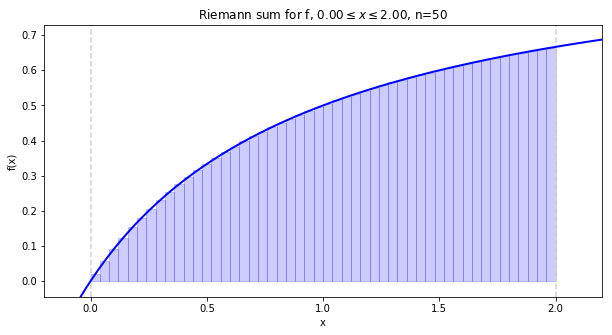

In [27]:
riemann_sum(0, 2, 50, lambda x: x/(x+1))

Riemann sum for f from 1 to 5 with n=4:
delta_x: 1.0
x: [ 1.5  2.5  3.5  4.5]
y: [ 0.50204286  0.51303124  0.36991795  0.22495718]


1.6099492285561432

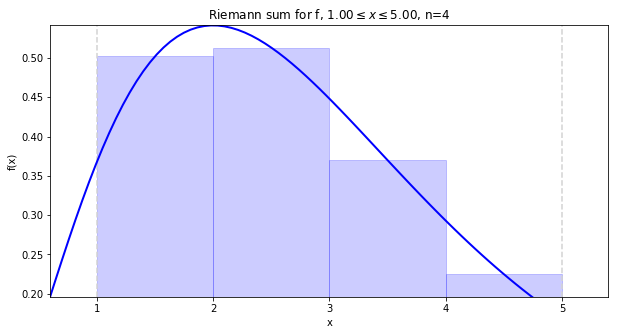

In [28]:
riemann_sum(1, 5, 4, lambda x: x**2*math.e**(-x))

Riemann sum for f from 1 to 5 with n=10:
delta_x: 0.4
x: [ 1.2  1.6  2.   2.4  2.8  3.2  3.6  4.   4.4  4.8]
y: [ 0.43371967  0.51685509  0.54134113  0.52253541  0.47675089  0.41740497
  0.35411544  0.29305022  0.2376893   0.18961337]


1.5932301970012082

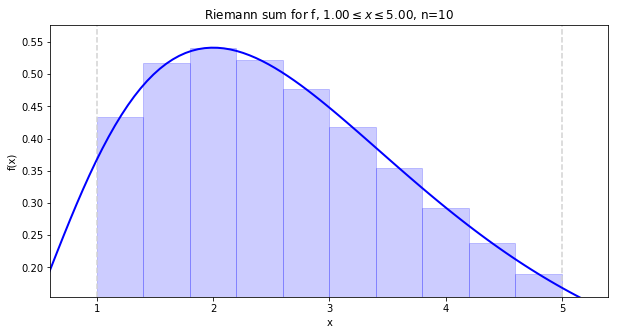

In [29]:
riemann_sum(1, 5, 10, lambda x: x**2*math.e**(-x))

Riemann sum for f from 1 to 5 with n=20:
delta_x: 0.2
x: [ 1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7  2.9  3.1  3.3  3.5  3.7  3.9
  4.1  4.3  4.5  4.7  4.9]
y: [ 0.40277401  0.46057873  0.50204286  0.52795538  0.53994272  0.54003285
  0.53036928  0.51303124  0.48992819  0.46274528  0.43292284  0.40165769
  0.36991795  0.33846508  0.30787947  0.27858667  0.25088266  0.22495718
  0.20091467  0.17879246]


1.5908754418441284

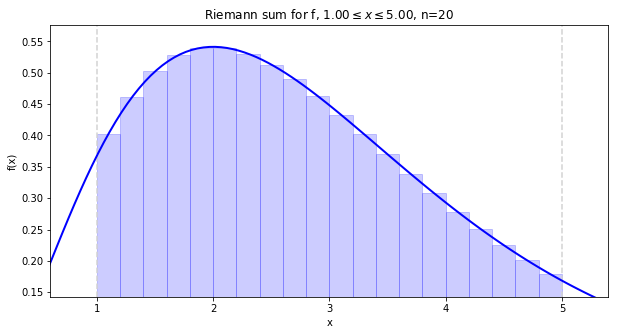

In [30]:
riemann_sum(1, 5, 20, lambda x: x**2*math.e**(-x))

Riemann sum for f from 0 to 1.5 with n=28:
delta_x: 0.05357142857142857
x: [ 0.02678571  0.08035714  0.13392857  0.1875      0.24107143  0.29464286
  0.34821429  0.40178571  0.45535714  0.50892857  0.5625      0.61607143
  0.66964286  0.72321429  0.77678571  0.83035714  0.88392857  0.9375
  0.99107143  1.04464286  1.09821429  1.15178571  1.20535714  1.25892857
  1.3125      1.36607143  1.41964286  1.47321429]
y: [ 0.00225401  0.02028472  0.0563205   0.11022221  0.18156239  0.26936685
  0.37178223  0.48569042  0.60630799  0.72683235  0.83822471  0.92924818
  0.98690047  0.99738179  0.94770555  0.82797483  0.63419967  0.37131719
  0.05582039 -0.28284649 -0.60311654 -0.85527257 -0.98906599 -0.96463932
 -0.76516727 -0.40821564  0.04831723  0.51001546]


0.27371814340939032

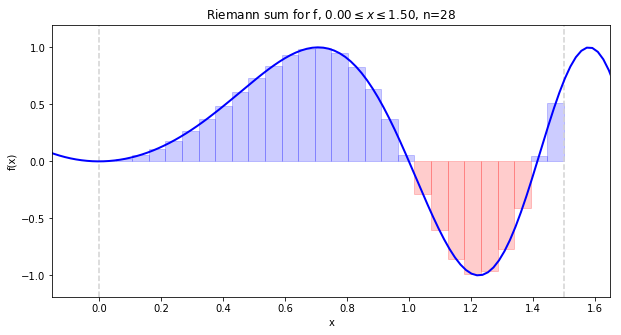

In [31]:
riemann_sum(0, 1.5, 28, lambda x: sin(math.pi*x**2))

Evaluating the right hand Riemann sums $R_n$ for the integral $\int^\pi_0 \sin x \ \mathrm{d}x$ with $n=5,10,50,100$.

In [32]:
for n in [5, 10, 50, 100]:
    delta_x = math.pi / n
    x = np.linspace(0, math.pi - delta_x, n)
    y = np.array([math.sin(x) for x in x])
    rs = np.sum(y)*delta_x
    print('Right hand sum for n={} yields {:.6f}.'.format(n, rs))

Right hand sum for n=5 yields 1.933766.
Right hand sum for n=10 yields 1.983524.
Right hand sum for n=50 yields 1.999342.
Right hand sum for n=100 yields 1.999836.


**Right-hand sum**

In [33]:
def rhs(a, b, n, f):
    delta_x = (b - a) / n
    x = np.linspace(a, b - delta_x, n) + delta_x
    y = np.array([f(x) for x in x])
    return np.sum(y) * delta_x

In [34]:
rhs(0, math.pi, 10, lambda x: math.sin(x))

1.9835235375094546

**Left-hand sum**

In [35]:
def lhs(a, b, n, f):
    delta_x = (b - a) / n
    x = np.linspace(a, b - delta_x, n) 
    y = np.array([f(x) for x in x])
    return np.sum(y) * delta_x

In [36]:
lhs(0, math.pi, 10, lambda x: math.sin(x))

1.9835235375094546

**Midpoint sum**

In [37]:
def mps(a, b, n, f):
    delta_x = (b - a) / n
    x = np.linspace(a, b - delta_x, n) + delta_x / 2
    y = np.array([f(x) for x in x])
    return np.sum(y) * delta_x

In [38]:
mps(0, math.pi, 10, lambda x: math.sin(x))

2.0082484079079741

Evaluating the left and right Riemann sums $L_n$ and $R_n$ for the integral $\int_0^\pi e^{-x^2} \ \mathrm{d}x$ with $n=5,10,50,100$.

Riemann sum for f from -1 to 2 with n=10:
delta_x: 0.3
x: [-0.85 -0.55 -0.25  0.05  0.35  0.65  0.95  1.25  1.55  1.85]
y: [ 0.4855369   0.73896849  0.93941306  0.99750312  0.8847059   0.65540625
  0.40555451  0.20961139  0.09049144  0.03263076]
Mn: 1.631946545329588

Left-hand sum with n=5 yields 1.7093781085524424.
Right-hand sum with n=5 yields 1.4996398271828173.

Left-hand sum with n=10 yields 1.675264205190129.
Right-hand sum with n=10 yields 1.5703950645053164.

Left-hand sum with n=15 yields 1.6611635307907133.
Right-hand sum with n=15 yields 1.591250770334172.

Left-hand sum with n=20 yields 1.6536053752598583.
Right-hand sum with n=20 yields 1.6011708049174522.

Left-hand sum with n=25 yields 1.6489083135090052.
Right-hand sum with n=25 yields 1.6069606572350803.

Left-hand sum with n=30 yields 1.6457094266414463.
Right-hand sum with n=30 yields 1.6107530464131754.

Left-hand sum with n=35 yields 1.6433914547881507.
Right-hand sum with n=35 yields 1.6134288431639188.

Left-ha

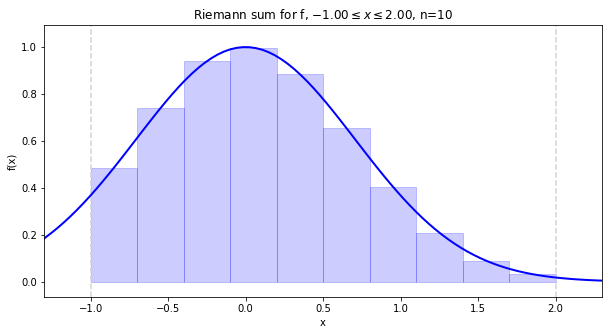

In [39]:
f = lambda x: math.e**(-x**2)
print('Mn: {}\n'.format(riemann_sum(-1, 2, 10, f)))

x = np.arange(5, 100, 5)
y1 = []
y2 = []

for n in x:
    fx = lhs(-1, 2, n, f)
    y1.append(fx)
    print('Left-hand sum with n={} yields {}.'.format(n, fx))
    fx = rhs(-1, 2, n, f)
    y2.append(fx)
    print('Right-hand sum with n={} yields {}.\n'.format(n, fx))

**Limit approximation**

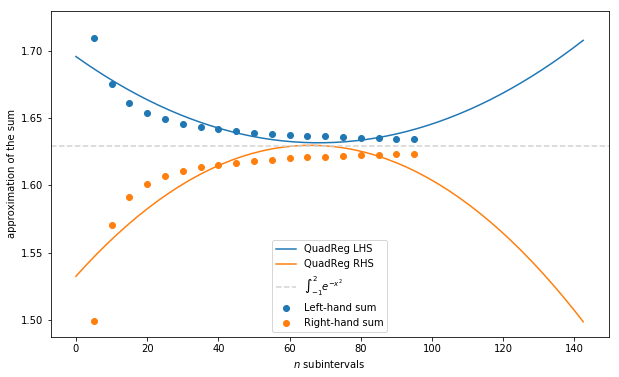

In [40]:
import numpy.polynomial.polynomial as poly

plt.figure(figsize=(10,6))
scatter(x, y1)
scatter(x, y2)

reg1 = reg2 = np.linspace(0, x[-1]*1.5)

pf1 = poly.polyfit(x, y1, 2)
p1 = poly.Polynomial(pf1)
r1 = p1(reg1)
plot(reg1, r1)

pf2 = poly.polyfit(x, y2, 2)
p2 = poly.Polynomial(pf2)
r2 = p2(reg2)
plot(reg2, r2)

axhline(y=1.62891, c='lightgray', ls='--')

xlabel('$n$ subintervals')
ylabel('approximation of the sum')
legend(['QuadReg LHS', 'QuadReg RHS', '$\int_{-1}^2 e^{-x^2}$', 'Left-hand sum', 'Right-hand sum']);

The idea was to approximate the limit by finding the intersection between the two quadratic regressors. As we can see from the plot, it won't be that easy.

It seems that the limit is between the left and the right hand sum. If we add half of the difference to the lower sum we might get a good approximate result of the limit.

$$x = L_n + \dfrac{R_n-L_n}{2}\iff x=\dfrac{R_n+L_n}{2}$$

In [41]:
x = (y2[-1] + y1[-1]) / 2

In [42]:
x

1.6288382908559531

Considering that $\int_{-1}^2 e^{-x^2} \approx 1.62891$, we are indeed quite close. Let's see what $M_n$ yields:

In [43]:
mn = mps(-1, 2, 100, f)

In [44]:
mn

1.6289358626060413

This result is even better than our previous approximation.

(1.6288, 1.62898)

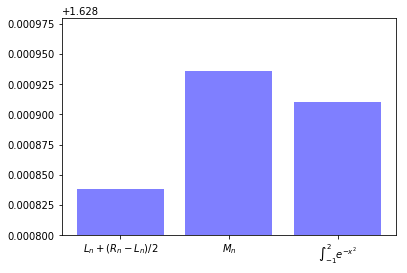

In [45]:
bar(['$M_n$', '$\int_{-1}^2e^{-x^2}$', '$L_n + (R_n-L_n)/2$'], [mn, 1.62891, x], facecolor='b', alpha=0.5)
ylim((1.6288, 1.62898))

In [46]:
f = lambda x: math.sin(x)

In [52]:
x = np.linspace(0, math.pi*2, 100)

In [53]:
y = [f(x) for x in x]

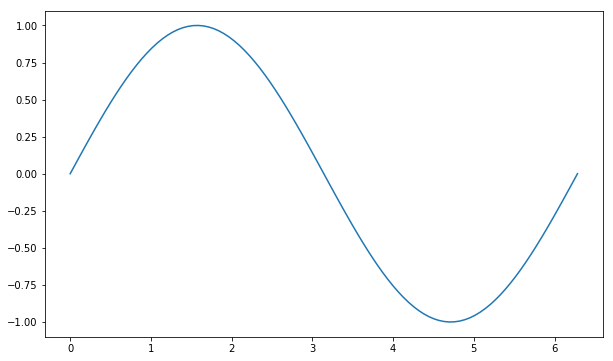

In [56]:
plt.figure(figsize=(10,6))
plot(x,y)

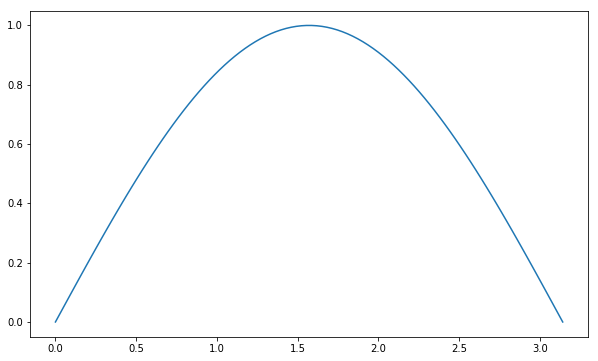

In [58]:
x = np.linspace(0, math.pi, 100)
y = [f(x) for x in x]
plt.figure(figsize=(10,6))
plot(x,y)

Riemann sum for f from 0 to 3.141592653589793 with n=10:
delta_x: 0.3141592653589793
x: [ 0.15707963  0.4712389   0.78539816  1.09955743  1.41371669  1.72787596
  2.04203522  2.35619449  2.67035376  2.98451302]
y: [ 0.15643447  0.4539905   0.70710678  0.89100652  0.98768834  0.98768834
  0.89100652  0.70710678  0.4539905   0.15643447]


2.0082484079079741

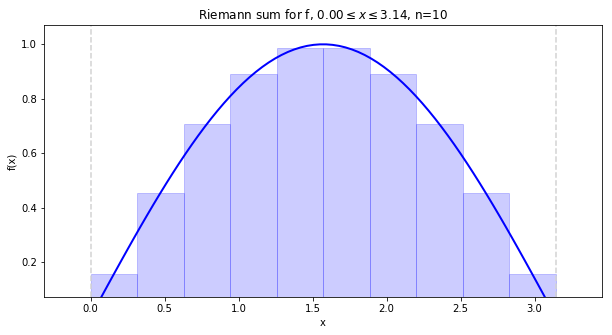

In [62]:
riemann_sum(0, math.pi, 10, lambda x: math.sin(x))